# Use of create_polar_bins function
In this notebook some quick examples of use of **rasmus_lib.create_polar_bins** are demonstrated

## General questions to this (12/10'16):

- I am not entirely sure if more input types are possible/necessary
- Output type might be different if input type is not as specified, I guess that is fine?
- Is my unit for input of pixel_area in docstring correct? (I figured (0.124 μm)^2, but I'd like to be sure)
- I create variables in the function for better readability, does that matter?
- Lastly: I kept the numpy.arrange function - it becomes handy now that I don't define the number of bins anymore ;)

In [2]:
%pylab inline
import PolarX.base_lib as bl
import pickle
import xarray as xr
import scipy as sp
import numpy as np
plt.style.use('ggplot')

import rasFiles.rasmus_lib as rl

Populating the interactive namespace from numpy and matplotlib


### Creating testData and testData2d for testing of function
 testData2d is plotted for reference

In [4]:
pkl_file = open("rasFiles/x_cut.pkl", 'rb')
data = pickle.load(pkl_file)
pkl_file.close
del pkl_file

testData = data.isel(t = slice(0,1000))
testData2d = testData.mean('t')

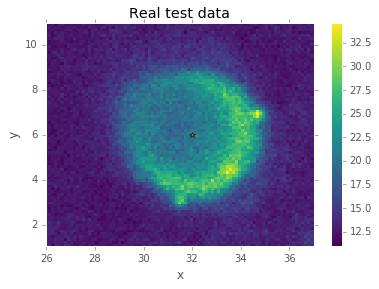

In [5]:
figure()
testData2d.plot()
plot(32, 6,'*')
title('Real test data')

## Multiple different ways of using the function (outcommented)
The simplest use of the function is to only specify number of theta bins (acceptable for standard image sizes only)

In [6]:
#thetaBins, rBins = rl.create_polar_bins(8)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65, r_stop = 8)
#thetaBins, rBins = rl.create_polar_bins(8,n_pixels=65, r_stop = 8, pixel_area = 0.124**2)

thetaBins, rBins = rl.create_polar_bins(8)


data2d_polar   = bl.darray_to_polar(testData2d, origin=(32, 6), bins=(thetaBins, rBins), statistic=np.mean)
data2d_polar_n = bl.darray_to_polar(testData2d, origin=(32, 6), bins=(thetaBins, rBins), statistic=np.size)

## Plotting of results

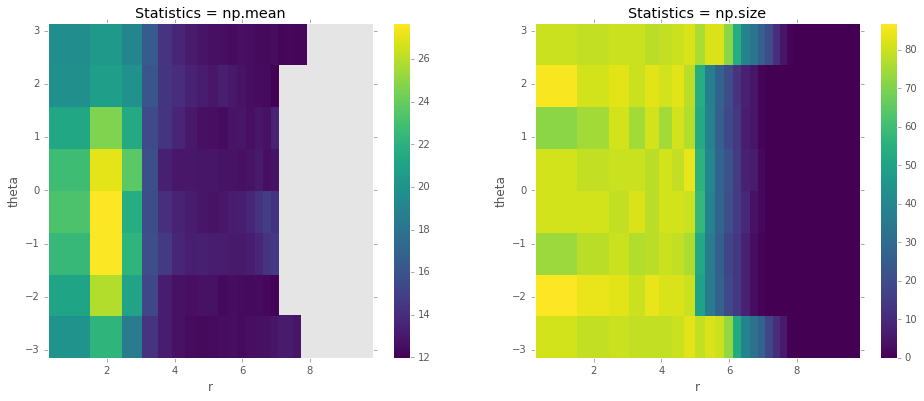

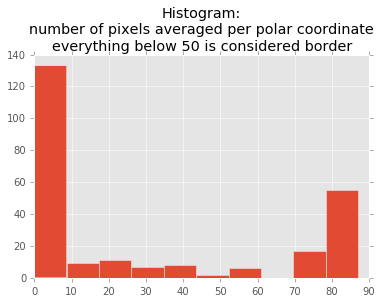

In [7]:
fig, ax = subplots(1, 2, figsize=(16, 6));
data2d_polar.plot(ax = ax[0]);
ax[0].title.set_text('Statistics = np.mean');
data2d_polar_n.plot(ax = ax[1]);
ax[1].title.set_text('Statistics = np.size');

figure()
plt.hist(np.ravel(data2d_polar_n.values));
title('Histogram:\nnumber of pixels averaged per polar coordinate\neverything below 50 is considered border');

In [8]:
pwd

'C:\\Users\\Rasmus Hvid\\Documents\\MedTek\\Kurser\\modellingBrain\\gitRas'